In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data

import env
from env import host, username, password
from scipy.stats import poisson

def get_db_url(database):
    database = database
    url = f'mysql+pymysql://{username}:{password}@{host}/{database}'
    return url


1.A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    What is the probability that no cars drive up in the noon hour?
    What is the probability that 3 or more cars come through the drive through?
    How likely is it that the drive through gets at least 1 car?


<BarContainer object of 11 artists>

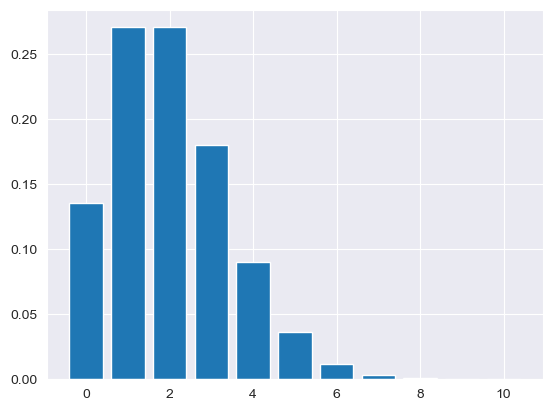

In [2]:
plt.bar(x=[0,1,2,3,4,5,6,7,8,9,10], height=poisson.pmf(mu=2, k=[0,1,2,3,4,5,6,7,8,9,10]))

In [3]:
poisson.pmf(mu=2, k=0)

0.1353352832366127

In [4]:
poisson.pmf(mu=2, k=3)

0.18044704431548356

In [5]:
poisson.pmf(mu=2, k=1)

0.2706705664732254


2.Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    What grade point average is required to be in the top 5% of the graduating class?

In [6]:
stats.norm(3, .3).isf(.05)

3.4934560880854417

    What GPA constitutes the bottom 15% of the class?

In [7]:
stats.norm(3, .3).ppf(.15)

2.689069983151863

    An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [8]:
stats.norm(3, .3).ppf(.2)

2.7475136299281258

    If I have a GPA of 3.5, what percentile am I in?

In [9]:
stats.norm(3, .3).cdf(3.5)

0.9522096477271853

3.A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [10]:
stats.binom(4326, .02).sf(97)

0.11781530585978471


4.You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.


    What is the probability that at least one of your first 60 answers is correct?

In [11]:
stats.binom(60, .01).sf(0)

0.45284335760923855

5.The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it,
and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day?

In [12]:
students = 3 * 22
break_area = round(students * .9)
stats.binom(break_area, .03).sf(0)

0.8342199288437352

How likely is it that it goes two days without getting cleaned up?

In [13]:
# 2 days without cleaning
(stats.binom.pmf(0, break_area , .03)** 2)



0.02748303199257613

All week?


In [14]:
(stats.binom.pmf(0,break_area, .03) ** 5)

0.00012521651388091242

6.You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [15]:
import scipy.stats as stats

# Normal distribution parameters
mean = 15
std_dev = 3

# Maximum number of people you can wait for
max_people = 17

# Calculate the z-score
z_score = (max_people - mean) / std_dev

# Calculate the probability
probability = stats.norm.cdf(z_score)

print(f"The likelihood that you have at least 15 minutes left to eat your food before you have to go back to class: {probability * 100:.2f}%")


The likelihood that you have at least 15 minutes left to eat your food before you have to go back to class: 74.75%


7.Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

    What percent of employees earn less than 60,000?
    What percent of employees earn more than 95,000?
    What percent of employees earn between 65,000 and 80,000?
    What do the top 5% of employees make?
Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:


import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
pd.read_sql('SELECT * FROM departments', url)

In [16]:
pf = pd.read_sql('SELECT * FROM salaries', get_db_url('employees')).head(10)
pf

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


The average battery life for a fully charges iphone-12 is 14 hours with standard deviation of 1.5 hour

What kind of probability distribution represents the random variable "battery life in hours"?

In [17]:
iphone_battery = stats.norm(14, 1.5)


What are the appropriate defining parameters for this distribution?

In [18]:
mean = 14
std = 1.5

Create a Scipy object/instance for this distribution
Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:
 a. What is the probability the cell phone battery more than 16 hours.
 b. What is probability that cell phone battery lasts for exactly 12 hours.
 c. What is the probability that cell phone battery lasts for 12 hours or less.
 d. How many hours do the battery lasts for top 25% longest lasting phones.

In [19]:
# probability that battery lasts more than 16 hours
iphone_battery.sf(16)

0.09121121972586788

In [20]:
# probability that battery lasts exactly 12 hours
iphone_battery.pdf(12)

0.10934004978399577

In [21]:
# probability that battery lasts 12 hours or less
iphone_battery.cdf(12)

0.09121121972586788

In [22]:
# how many hours do the battery lasts for top 25% longest lasting phones
iphone_battery.ppf(.75)

15.011734625294123